In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(Y_train)

[5 0 4 ... 5 6 8]


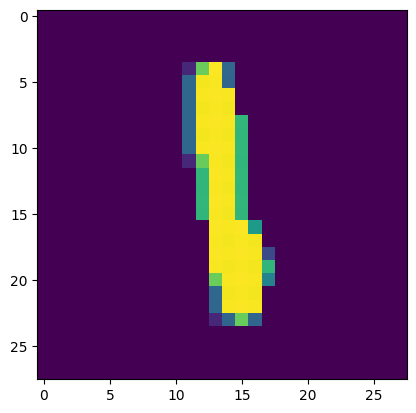

1


In [9]:
plt.imshow(X_train[200])
plt.show()

print(Y_train[200])

In [7]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

In [12]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3048 - accuracy: 0.9110
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1410 - accuracy: 0.9586
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1060 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0864 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0723 - accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0621 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0540 - accuracy: 0.9827
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0481 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9859
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.037

In [14]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.0999 - accuracy: 0.9743
0.9743000268936157


In [15]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [16]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [17]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

Text(0.5, 47.7222222222222, 'Predicted labels')

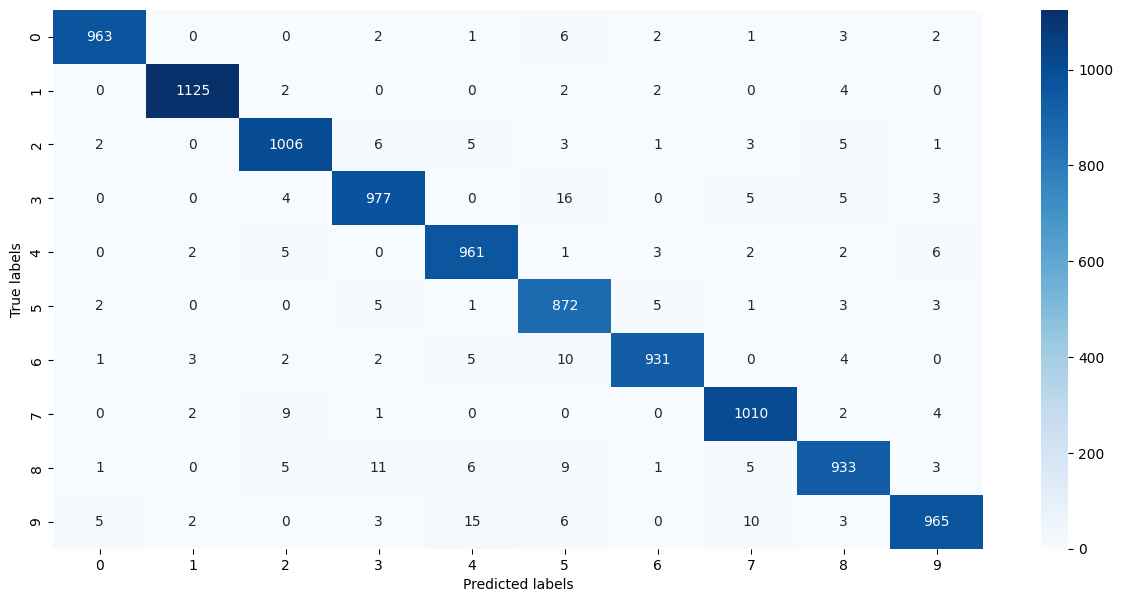

In [19]:
plt.figure(figsize = (15, 7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')